### An Image Classification Model From Scratch

#### The Fashion MNIST dataset
- The fashion_mnist dataset consists of 70,000 images across 10 categories.
- This dataset is available in a convenient format through $Keras$, so we will load it and take a look.



---





---



We will first import the following packages and set the seed for the random number generator.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# initialize the seeds of different random number generators so that
# Lock randomness so your neural network behaves the same every run.
keras.utils.set_random_seed(42)

The Fashion-mnist data is actually available in $keras$. it's one of the standard datasets.

$keras$ has not only made the data available it has already split it into a *training* and *test* set. So we don't have to do splitting. But why would they do that?

They do that so that different people who are building algorithms for that particular dataset can all be evaluated using the same *test* set.

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


The input data is a $tensor$ of rank 3( is just a list of rank 2 $tensors$ ). Here there are 60,000 images in the training set, each of which is a 28x28 matrix.

The remaining 10,000 images are in the test set.

OK, let's look at the first 10 rows of the dependent variable y.

In [4]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

So whenever i'm working with multi-class classification problems, I always do create a little list to help me figure out that 10 corresponds labels.

In [5]:
labels = ["T-shirt/top",
          "Trouser",
          "Pullover",
          "Dress",
          "Coat",
          "Sandal",
          "Shirt",
          "Sneaker",
          "Bag",
          "Ankle boot"]

In [6]:
labels[y_train[14]]

'Sneaker'

The 15th image is "Sneaker"!

Let's take a look at the **raw data** for the image.

In [7]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

You can actually look at the raw data for that image, which is just a 28x28 pixels and these are the numbers you have.



---



You can actually visualize the first 25 images. I have a little bit of code here which visualizes that.

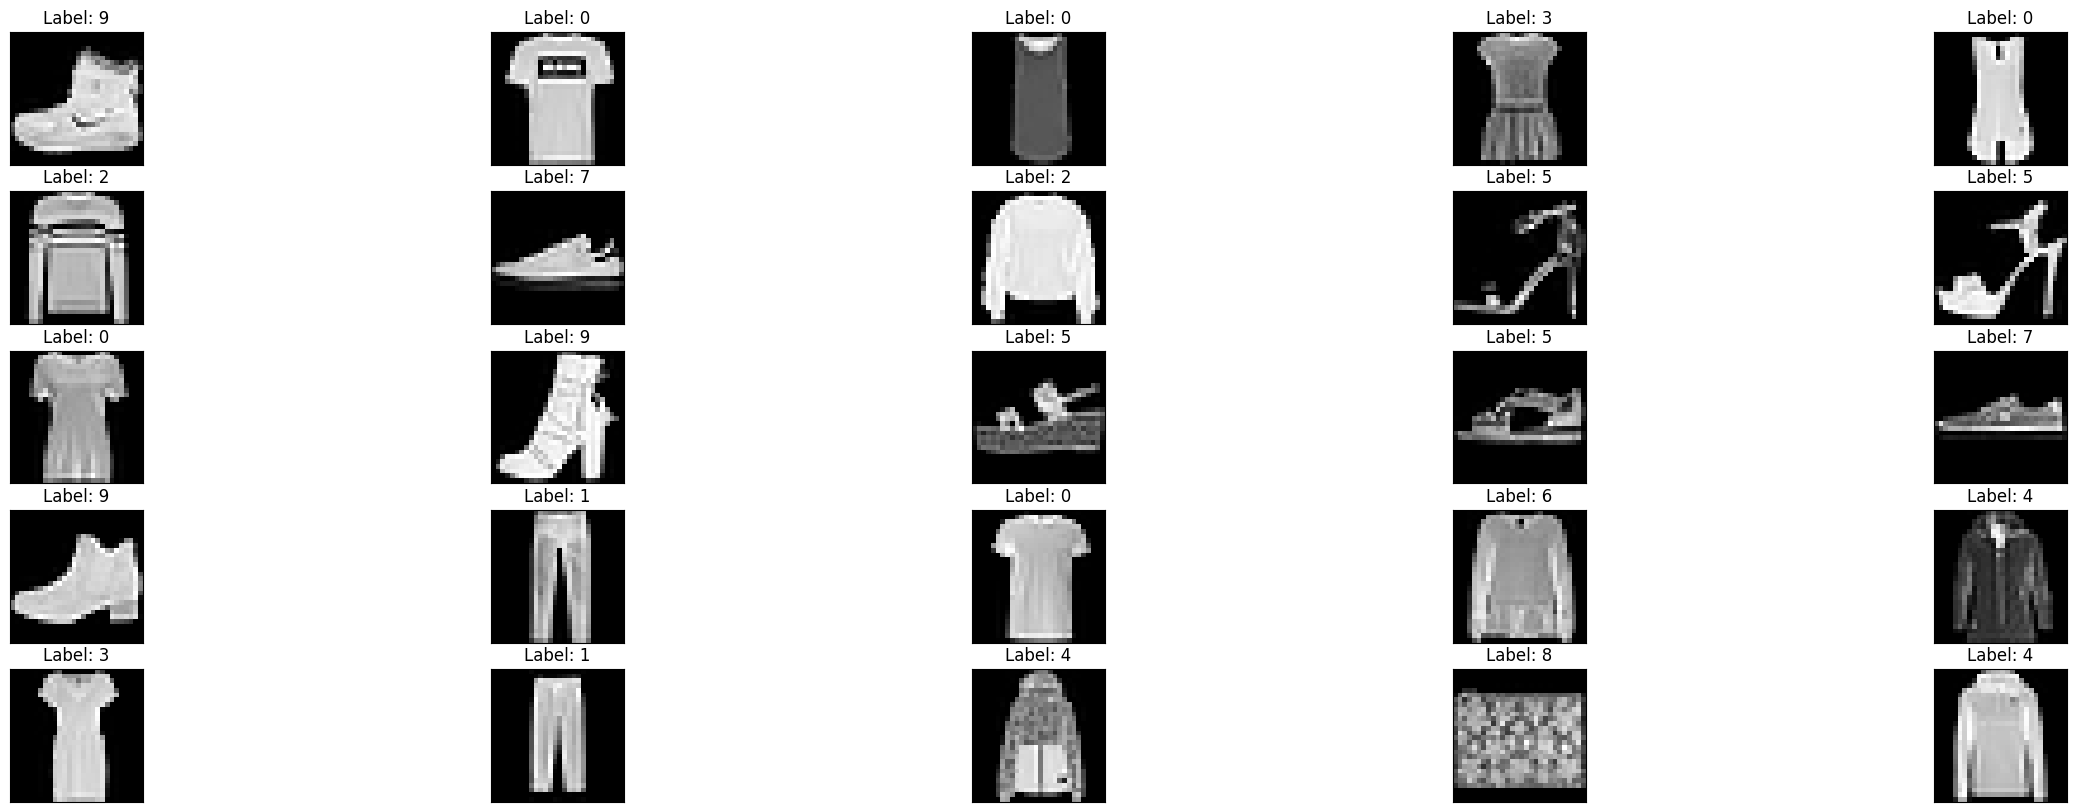

In [8]:
fig, ax = plt.subplots(5, 5, figsize=(30, 10))
for i in range(25):
    axc = ax[i // 5, i %5]
    axc.imshow(X_train[i], cmap="gray")
    axc.set_title(f"Label: {y_train[i]}")
    axc.set_xticks([])
    axc.set_yticks([])
plt.show()

### NN Model

#### Data Preperation
NNs learn best when each independent variable is in a small range. So, standardize them by either:'
- subtracting the mean and dividing by the standard deviation or
- if they are in guranteed range, just divide by the max value.

The inputs here are range from 0 to 255. Let's normalize to the 0-1 range by dividing everything by 255.

In [9]:
X_train = X_train/ 255.0
X_test = X_test/ 255.0

### Define Model in $Keras$
- The input will be 28 x 28 matrices of numbers. These will have to be *flattened* into a long vector and fed to the next layer.
- We will use a single hidden layer
- Since thia is a *multi-class classification problem* (e.g., we need to predict one of 10 clothing categories), the output layer has to produce a 10-element vector of probabilities that sum up to 1.0 => we will use the $Softmax$ layer

In [10]:
# define the input layer
input = keras.Input(shape=(28,28))

# convert the 28 x 28 matrix of numbers into a longg vector
h = keras.layers.Flatten()(input)

# Feed the longg vector to the hidden layer
h = keras.layers.Dense(256, activation="relu", name = "hidden")(h)

# Feed the output of the hidden layer to the output layer
output = keras.layers.Dense(10, activation="softmax", name= "Output")(h)

# tell keras that this (input,output) pair is your model
model = keras.Model(input, output)

The ``model.summary()`` command is a good way to get a quick overview of what you have defined.

In [11]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden (Dense)                  │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Let's hand-calculate the number of parameters to verify
(784*256 + 256) + (256*10 + 10)

203530

We can visualize the network graphically as well using Keras' ``plot_model`` function.

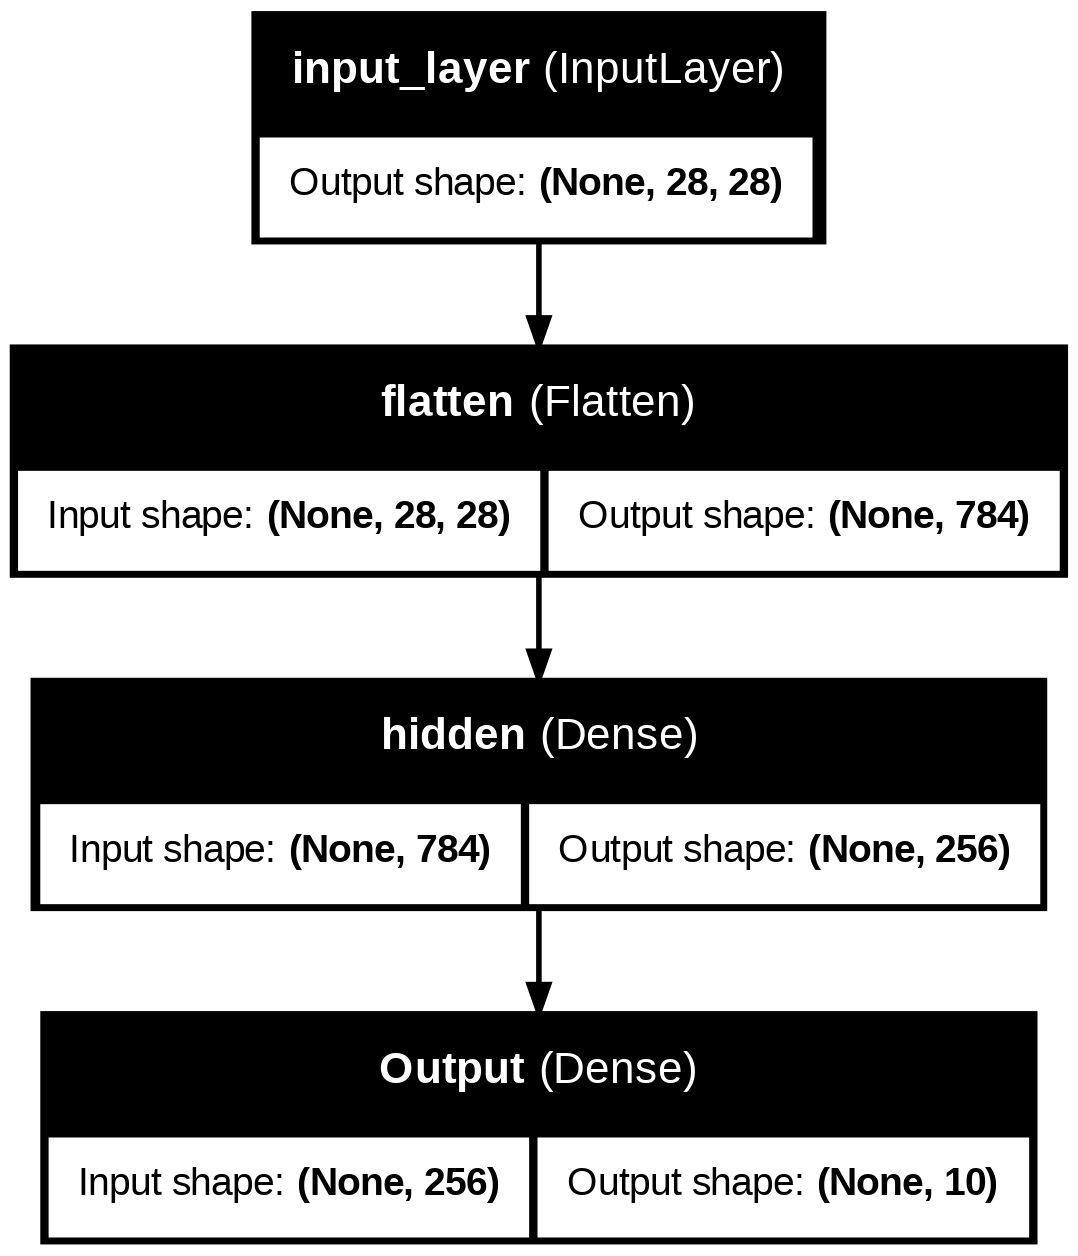

In [13]:
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

### **Set Optimization Parameters**

Now that the model is defined, we need to tell $keras$ three things:
- What **loss function** to use -> ``sparse_categorical_crossentropy``
- Which **optimizer** to use -> we will use $Adam$ which is an excellent set-and-forget choice
- What **metrics** you want $keras$ to report out -> in classification problems like this one, $Accuracy$ is usually the metric you want to see.

Since our output variable is categorical with 10 levels, we will select the ``sparse_categorical_crossentropy`` loss function.

In [14]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

### Train the Model!
- The batch size => 32 or 64 are commomly used.
- The number of epochs i.e., how many passes through the training data => we will start with 20.
- To check for overfitting, we will ask $keras$ to automatically use 20% of the training data points as a validation set.


---

OK, let's train the model using ``model.fit`` function!

In [15]:
result = model.fit(X_train,
                   y_train,
                   batch_size = 64,
                   epochs = 20,
                   validation_split = 0.2)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7676 - loss: 0.6644 - val_accuracy: 0.8565 - val_loss: 0.4108
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8596 - loss: 0.3972 - val_accuracy: 0.8664 - val_loss: 0.3755
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8751 - loss: 0.3491 - val_accuracy: 0.8727 - val_loss: 0.3553
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8846 - loss: 0.3191 - val_accuracy: 0.8783 - val_loss: 0.3455
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8920 - loss: 0.2977 - val_accuracy: 0.8825 - val_loss: 0.3393
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8973 - loss: 0.2796 - val_accuracy: 0.8820 - val_loss: 0.3429
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9024 - loss: 0.2644 - val_accuracy: 0.8820 - val_loss: 0.3409
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9076 - loss: 0.2520 - val_accuracy: 0.

Let's plot the loss and accuracy curves to see if **overfitting** is going on and if **early stopping** may be needed.

In [16]:
def plot_loss_curves(result):
  plt.clf()
  result_dict = result.history
  loss_values = result_dict["loss"]
  val_loss_values = result_dict["val_loss"]
  epochs = range(1, len(loss_values) + 1)

  plt.plot(epochs, loss_values,"bo", label="Training loss")
  plt.plot(epochs, val_loss_values, "b", label="Validation loss")
  plt.title("Training and validation loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

In [17]:
def plot_acc_curves(result):
  plt.clf()
  result_dict = result.history
  acc = result_dict["accuracy"]
  val_acc = result_dict["val_accuracy"]
  epochs = range(1, len(acc) + 1)

  plt.plot(epochs, acc,"bo", label="Training acc")
  plt.plot(epochs, val_acc, "b", label="Validation acc")
  plt.title("Training and validation accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

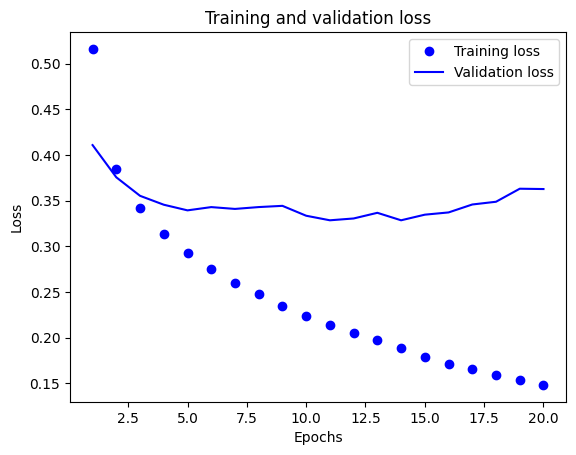

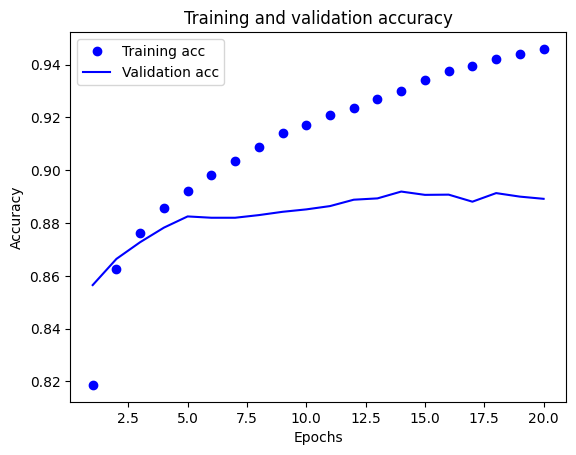

In [18]:
plot_loss_curves(result)
plot_acc_curves(result)

DO you think there's overfitting?

if you think there's overfitting at epoch N, we could go back, re-initialize the model and just run it for N epochs - that would be an example of **early stopping**



---



### Evaluate the Model

Let's see how well the model does on the test set.

In [19]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8823 - loss: 0.3823


[0.39565277099609375, 0.8810999989509583]



---





---





---



### Let's add **second** hidden layer, and see what happens:

In [20]:
input2 = keras.Input(shape=(28,28))

h2 = keras.layers.Flatten()(input2)

h2 = keras.layers.Dense(256, activation= "relu", name = "hidden1")(h2)

h2 = keras.layers.Dense(256, activation= "relu", name = "hidden2")(h2)

output2 = keras.layers.Dense(10, activation ="softmax", name = "output")(h2)

model2 = keras.Model(input2, output2)

In [21]:
model2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden1 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

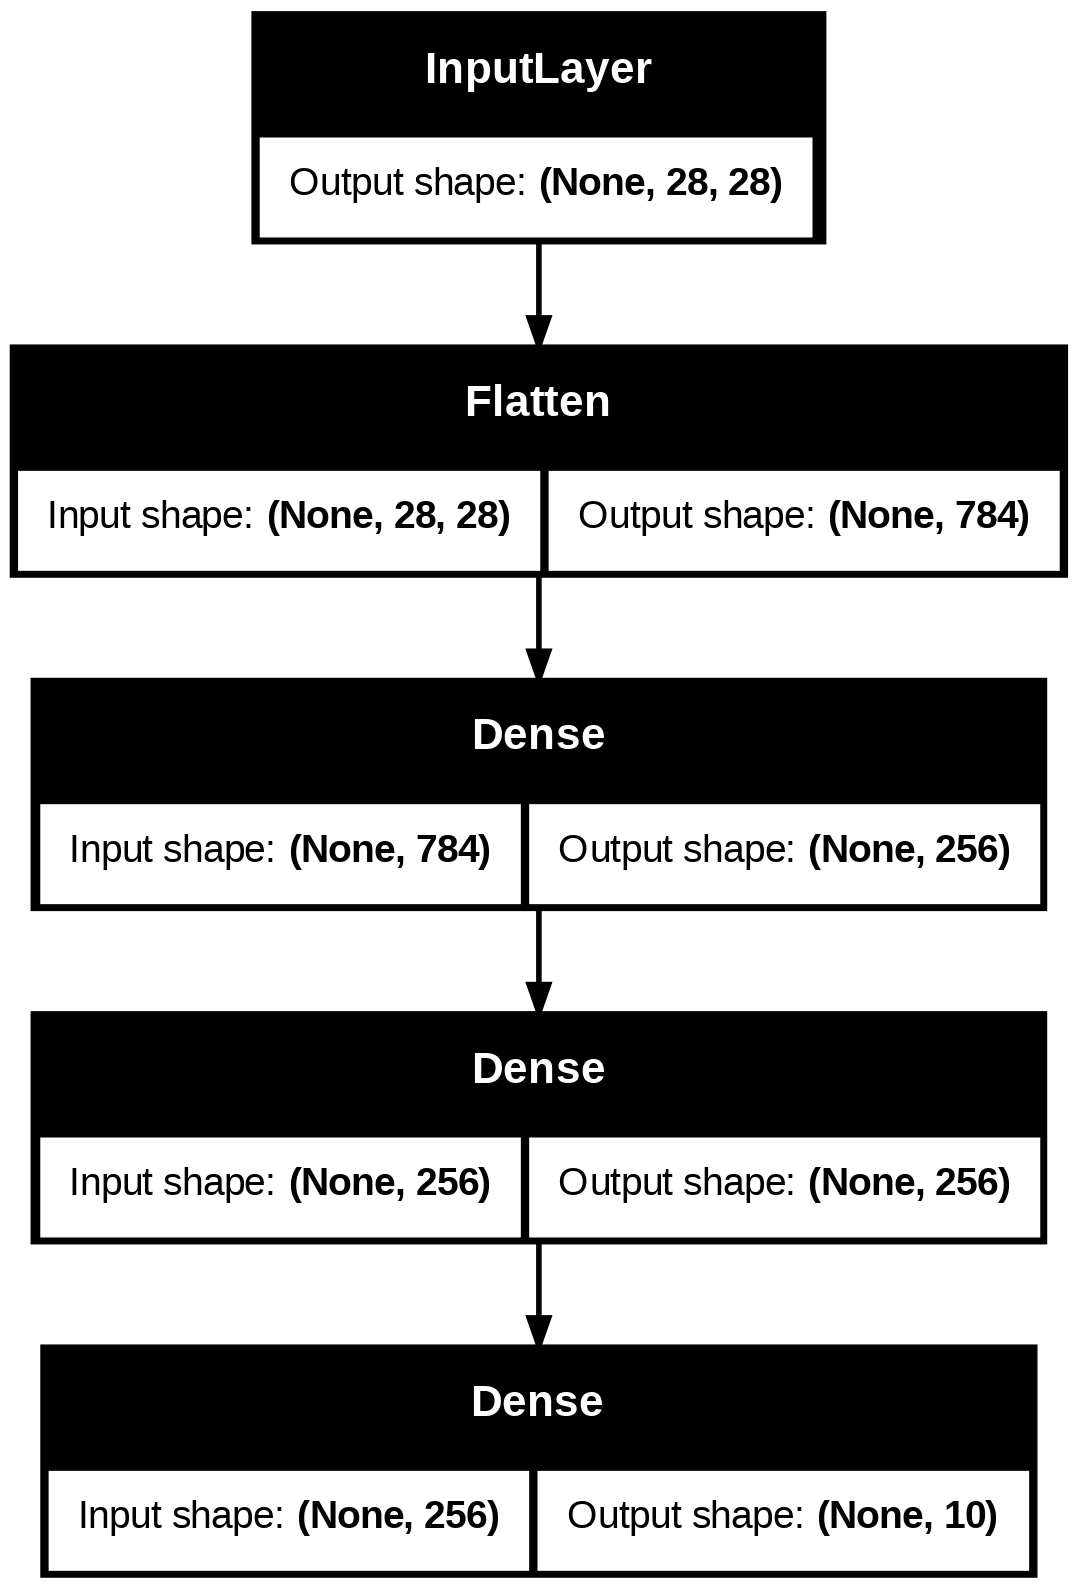

In [22]:
keras.utils.plot_model(model2, show_shapes = True)

In [23]:
model2.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

In [24]:
result2 = model2.fit(X_train,
                    y_train,
                    batch_size = 64,
                    epochs = 20,
                    validation_split= 0.2)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7734 - loss: 0.6416 - val_accuracy: 0.8563 - val_loss: 0.3988
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8635 - loss: 0.3789 - val_accuracy: 0.8681 - val_loss: 0.3677
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8778 - loss: 0.3315 - val_accuracy: 0.8712 - val_loss: 0.3641
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8863 - loss: 0.3066 - val_accuracy: 0.8748 - val_loss: 0.3554
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8950 - loss: 0.2838 - val_accuracy: 0.8745 - val_loss: 0.3515
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9014 - loss: 0.2656 - val_accuracy: 0.8760 - val_loss: 0.3615
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9053 - loss: 0.2534 - val_accuracy: 0.8724 - val_loss: 0.3748
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9096 - loss: 0.2393 - val_accuracy: 0.

In [25]:
from logging import logProcesses
def plot_loss_curves(result2):
  plt.clf()
  result2_dict = result2.history
  loss_values = result2_dict["loss"]
  val_loss_values = result2_dict["val_loss"]
  epochs = range(1, len(loss_values) + 1)

  plt.plot(epochs, loss_values,"bo", label="Training loss")
  plt.plot(epochs, val_loss_values, "b", label="Validation loss")
  plt.title("Training2 and validation2 loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

In [26]:
def plot_acc_curves(result2):
  plt.clf()
  result2_dict = result2.history
  acc = result2_dict["accuracy"]
  val_acc = result2_dict["val_accuracy"]
  epochs = range(1, len(acc) + 1)

  plt.plot(epochs, acc,"bo", label="Training acc")
  plt.plot(epochs, val_acc, "b", label="Validation acc")
  plt.title("Training2 and validation2 accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

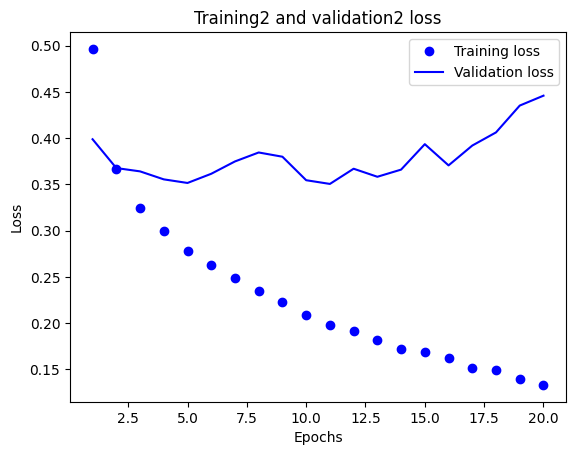

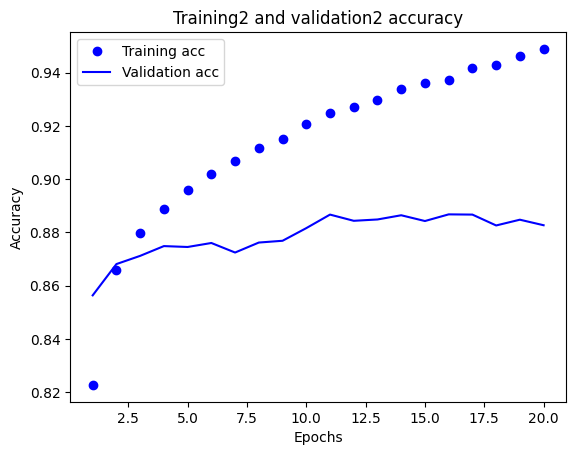

In [27]:
plot_loss_curves(result2)
plot_acc_curves(result2)

In [28]:
model2.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8788 - loss: 0.4769


[0.4747677743434906, 0.8790000081062317]

## **Summary**

**$Experiment 1$**: One Hidden Layer
1. **Loss curves** :
- *Training loss* : Goes smoothly from ~ 0.52 -> ~ 0.16 (keeps decreasing)
- *Validation loss* : Goes from ~ 0.41 -> ~ 0.33 and then slightly increases

**Interpretation** :
> - model is learning.
> - Validation loss bottoms around epoch ~ 10-12. After that it rises a bit -> **mild overfitting**.

2. **Accuracy curves** :
- Training accuracy : ~ 0.82 -> ~ 0.95
- Validation accuracy : ~ 0.86 -> ~ 0.90 and then slightly flat

**Interpretation** :
> - Training keeps improving.
> - Validation improves and then saturates.
> - Gap is ~ 5%
    
This is **Good generalization with small overfitting**.

3. **Test performance** :
- Test accuracy ~ 0.88
- Test loss ~ 0.38

    This is **solid and stable**.
---
---

**$Experiment 2$** : Two Hidden Layers

1. **Loss curves** :    
- *Training loss* : Goes from ~ 0.49 -> ~ 0.12 (even better than before)
- *Validation loss* : Goes from ~ 0.39 -> ~ 0.41 (keeps increasing!)

**Interpretation** :    
> - This is classic **overfitting**.
> - Model is memorizing training data and getting worse on unseen data.
> - Train loss -> $decreasing$ AND validation loss -> $increasing$

2. **Accuracy curves** :
- *Training accuracy* : Goes from ~ 0.82 -> ~ 0.97
- *Validation accuracy* : Stuck around ~ 0.88 - ~ 0.89 and noisy

**Interpretation** :
> - Training keeps improving
> - but Validation does not follow
> - Gap is now ~ 9% (big)

The model is learning patterns that do NOT generalize (poor generalization).

3. **Test performance** :
- Test accuracy ~ 0.87
- Test loss ~ 0.47 -  0.58

    Worse than the **simpler model**



---



### This proved that **More complex model not equal to better model**
Because it memorizes instead of learning.



> "The two-hidden-layer model achieves higher training accuracy but suffers from significant overfitting, as evidenced by increasing validation loss and stagnant validation accuracy. The one-hidden-layer model generalizes better and achieves higher test accuracy. Therefore, the simpler architecture is preferred."



In [29]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
